In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key
import time
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

592

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7e7be67db680e55c0875ab935aeb6f92


In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | ucluelet
Processing Record 3 of Set 1 | perth
Processing Record 4 of Set 1 | bogande
Processing Record 5 of Set 1 | ola
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | yagodnoye
Processing Record 8 of Set 1 | bay city
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | berlevag
Processing Record 13 of Set 1 | ostrovnoy
Processing Record 14 of Set 1 | puerto pinasco
City not found. Skipping...
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | marcona
City not found. Skipping...
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | berea
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | kelvin

Processing Record 39 of Set 4 | karasjok
Processing Record 40 of Set 4 | oranjemund
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | barrow
Processing Record 43 of Set 4 | hoegaarden
Processing Record 44 of Set 4 | olafsvik
Processing Record 45 of Set 4 | grajau
Processing Record 46 of Set 4 | papetoai
Processing Record 47 of Set 4 | baykit
Processing Record 48 of Set 4 | libertador general san martin
Processing Record 49 of Set 4 | penhold
Processing Record 50 of Set 4 | fairbanks
Processing Record 1 of Set 5 | cherskiy
Processing Record 2 of Set 5 | sydney
Processing Record 3 of Set 5 | urumqi
Processing Record 4 of Set 5 | maniitsoq
Processing Record 5 of Set 5 | merauke
Processing Record 6 of Set 5 | yerbogachen
Processing Record 7 of Set 5 | tulun
Processing Record 8 of Set 5 | tallahassee
Processing Record 9 of Set 5 | carutapera
Processing Record 10 of Set 5 | victoria
Processing Record 11 of Set 5 | point pedro
Processing Record 12 of Set 5 | ledya

Processing Record 28 of Set 8 | cabo san lucas
Processing Record 29 of Set 8 | nikki
Processing Record 30 of Set 8 | manta
Processing Record 31 of Set 8 | ouallam
Processing Record 32 of Set 8 | zaoyang
Processing Record 33 of Set 8 | vryburg
Processing Record 34 of Set 8 | verkhnevilyuysk
Processing Record 35 of Set 8 | gorodets
Processing Record 36 of Set 8 | rocha
Processing Record 37 of Set 8 | margate
Processing Record 38 of Set 8 | vendome
Processing Record 39 of Set 8 | correia pinto
Processing Record 40 of Set 8 | zemio
Processing Record 41 of Set 8 | alta floresta
Processing Record 42 of Set 8 | buqayq
City not found. Skipping...
Processing Record 43 of Set 8 | omboue
Processing Record 44 of Set 8 | haizhou
Processing Record 45 of Set 8 | makat
Processing Record 46 of Set 8 | kroya
Processing Record 47 of Set 8 | den helder
Processing Record 48 of Set 8 | port keats
Processing Record 49 of Set 8 | sutton
Processing Record 50 of Set 8 | kyren
Processing Record 1 of Set 9 | durb

Processing Record 14 of Set 12 | aykhal
Processing Record 15 of Set 12 | saint-joseph
Processing Record 16 of Set 12 | omsukchan
Processing Record 17 of Set 12 | hodkovice nad mohelkou
Processing Record 18 of Set 12 | alekseyevskaya
Processing Record 19 of Set 12 | nantucket
Processing Record 20 of Set 12 | crown point
Processing Record 21 of Set 12 | mezen
Processing Record 22 of Set 12 | yashkul
Processing Record 23 of Set 12 | san policarpo
Processing Record 24 of Set 12 | dekar
Processing Record 25 of Set 12 | tokur
Processing Record 26 of Set 12 | yakovlevka
Processing Record 27 of Set 12 | luganville
Processing Record 28 of Set 12 | otradinskiy
City not found. Skipping...
Processing Record 29 of Set 12 | ashqelon
Processing Record 30 of Set 12 | hirado
Processing Record 31 of Set 12 | chernitsyno
Processing Record 32 of Set 12 | zhigansk
Processing Record 33 of Set 12 | gap
Processing Record 34 of Set 12 | sinjar
Processing Record 35 of Set 12 | axim
Processing Record 36 of Set 1

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,62.01,77,0,7.00,ZA,2020-02-24 03:15:56
1,Ucluelet,48.93,-125.55,45.00,82,61,14.00,CA,2020-02-24 03:19:20
2,Perth,-31.93,115.83,84.20,48,20,19.46,AU,2020-02-24 03:20:40
3,Bogande,12.97,-0.14,73.76,12,0,10.33,BF,2020-02-24 03:20:40
4,Ola,59.58,151.28,0.99,77,5,3.49,RU,2020-02-24 03:20:40
5,Mataura,-46.19,168.86,72.55,45,10,5.37,NZ,2020-02-24 03:15:43
6,Yagodnoye,62.55,149.67,-15.07,86,0,2.68,RU,2020-02-24 03:20:41
7,Bay City,43.59,-83.89,42.80,74,1,10.29,US,2020-02-24 03:20:14
8,Dikson,73.51,80.55,23.90,91,100,27.76,RU,2020-02-24 03:16:15
9,Clyde River,70.47,-68.59,-20.20,75,90,16.11,CA,2020-02-24 03:16:03


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2020-02-24 03:15:56,-34.42,19.23,62.01,77,0,7.00
1,Ucluelet,CA,2020-02-24 03:19:20,48.93,-125.55,45.00,82,61,14.00
2,Perth,AU,2020-02-24 03:20:40,-31.93,115.83,84.20,48,20,19.46
3,Bogande,BF,2020-02-24 03:20:40,12.97,-0.14,73.76,12,0,10.33
4,Ola,RU,2020-02-24 03:20:40,59.58,151.28,0.99,77,5,3.49


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

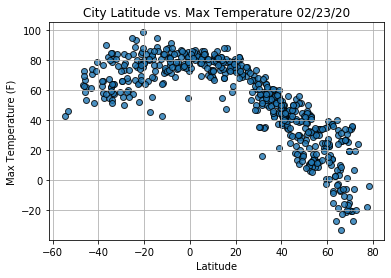

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

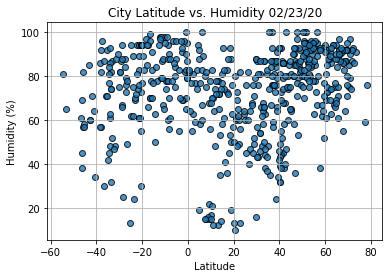

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

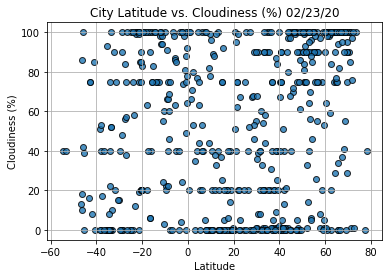

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

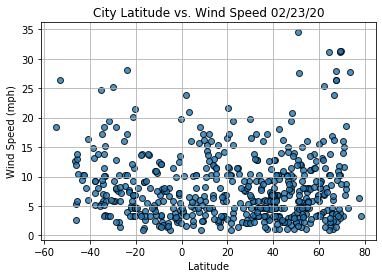

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [15]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(label=title)
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

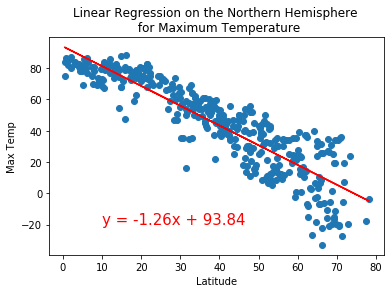

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,-20))

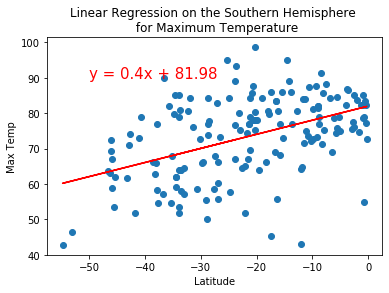

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

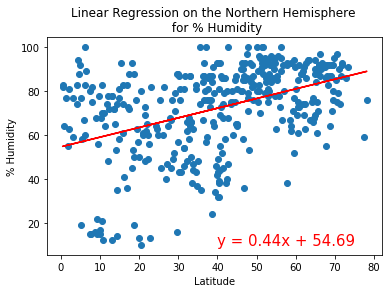

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

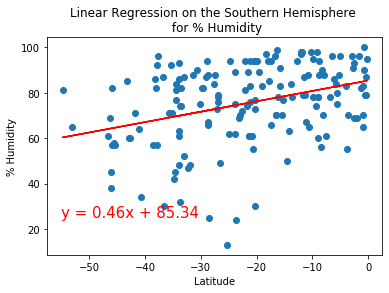

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,25))

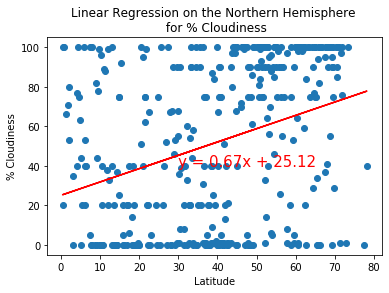

In [21]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(30,40))

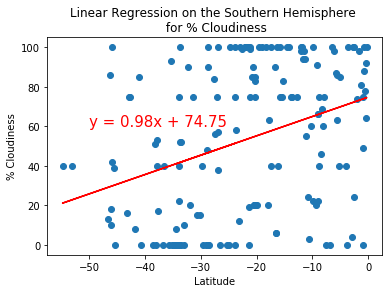

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

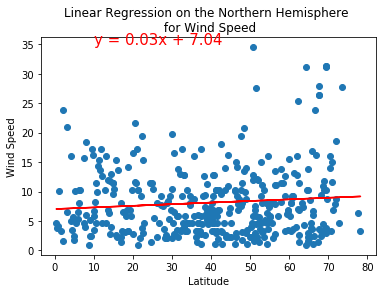

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))